We start off by loading all needed libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Loading data through pandas, as I'm removing release date, no need to parse it as date


In [2]:
df = pd.read_csv('tmdb-movies.csv', index_col=['id'])

Let's see what details are there for each movie: 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       

Some of these details are missing, they'll cause issues during data analysis. before going through looking at missing data, let's just drop all dumpicate records

In [4]:
duplicate_records = sum(df.duplicated()) # to get the number of duplicate records
df.drop_duplicates(inplace=True)   # drop all duplicates
print('{} duplicate records have been deleted'.format(duplicate_records))

1 duplicate records have been deleted


Going back to missing data from `df.info()`, let's have a quick look at how  many records are missing per column:

In [5]:
df.isnull().sum().sort_values(ascending=False)

homepage                7929
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
runtime                    0
budget_adj                 0
release_date               0
vote_count                 0
vote_average               0
release_year               0
original_title             0
revenue                    0
budget                     0
popularity                 0
revenue_adj                0
dtype: int64

Some of these columns are not needed, no need to waste any resource processing them: such as imdb_id, homepage, .... I'll drop both budget and revenue as {budget, revenue}_adj represent both in 2010 dollars.

Before dropping those columns, let's just have a quick look at them

In [6]:
df.sample(5)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
10660,tt0110167,0.936924,0,0,It Could Happen to You,Nicolas Cage|Bridget Fonda|Rosie Perez|Wendell...,NaN,Andrew Bergman,A cop. A waitress. A lottery ticket.,waitress|cop|lottery ticket|winning lottery,"Charlie Lang is a simple, kindhearted New York...",101,Comedy|Drama|Romance,TriStar Pictures,7/29/94,77,6.5,1994,0.000000e+00,0.000000e+00
25164,tt0086264,0.363044,0,0,Screwballs,Peter Keleghan|Kent Deuters|Linda Speciale|Ala...,NaN,Rafal Zielinski,The comedy that goes all the way!,sex|nudity|high school|teenager|teen comedy,"Welcome to T &amp; A High, where the entire st...",80,Comedy,NaN,4/1/83,12,5.2,1983,0.000000e+00,0.000000e+00
9655,tt0454945,1.470711,20000000,33889159,She's the Man,Amanda Bynes|Channing Tatum|Laura Ramsey|Vinni...,NaN,Andy Fickman,"If you wanna chase your dream, sometimes you g...",roommate|twin sister|boarding school|twin brot...,Viola Johnson is in a real jam. Complications ...,105,Comedy|Drama|Family|Romance,DreamWorks SKG|Lakeshore Entertainment,3/17/06,395,6.3,2006,2.163338e+07,3.665686e+07
25248,tt0384488,0.042066,0,0,Saint Ralph,Adam Butcher|Campbell Scott|Michael Kanev|Gord...,NaN,Michael McGowan,He's hoping for a miracle. He doesn't have a p...,sport|independent film,"This Canadian made comedy/drama, set in Hamilt...",95,Comedy|Drama,Alliance Atlantis Communications|Amaze Film + ...,9/11/04,14,6.3,2004,0.000000e+00,0.000000e+00
10359,tt0142804,0.166168,10000000,0,Resurrection,Christopher Lambert|Leland Orser|Barbara Tyson...,NaN,Russell Mulcahy,NaN,chicago|jesus christ,A seasoned police detective and his partner ha...,103,Crime|Drama|Horror,Interlight|Baldwin/Cohen Productions,6/5/99,19,6.1,1999,1.309053e+07,0.000000e+00


In [7]:
df.drop(labels=['release_date', 'original_title', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'production_companies', 'budget', 'revenue'], axis=1, inplace=True)

Let's drop any index now with at least one value of NA, just to have a dataframe with all values present.

In [8]:
df_clean = df.dropna(axis=0)
print("Number of deleted indexes for missing values {}".format(df.shape[0] - df_clean.shape[0]))

Number of deleted indexes for missing values 134


In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 135397 to 22293
Data columns (total 10 columns):
popularity      10731 non-null float64
cast            10731 non-null object
director        10731 non-null object
runtime         10731 non-null int64
genres          10731 non-null object
vote_count      10731 non-null int64
vote_average    10731 non-null float64
release_year    10731 non-null int64
budget_adj      10731 non-null float64
revenue_adj     10731 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 922.2+ KB


Now we are talking. Let's look at popularity.

# Popularity 

In [10]:
#Let's have a quick look at the data one more time
df_clean.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,0.652615,102.468829,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07
std,1.004804,30.493873,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.210765,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.387081,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.720889,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


As per [tmdb docs](https://developers.themoviedb.org/3/getting-started/popularity), popularity is updated daily and represents tons of things. For the sake of the project, I will drop it here. It could have some value, but in my project here.

In [11]:
df_clean.drop(labels=['popularity'], axis=1, inplace=True);

/home/raed/anaconda3/envs/py3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Runtime

Let's look at runtime

/home/raed/anaconda3/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


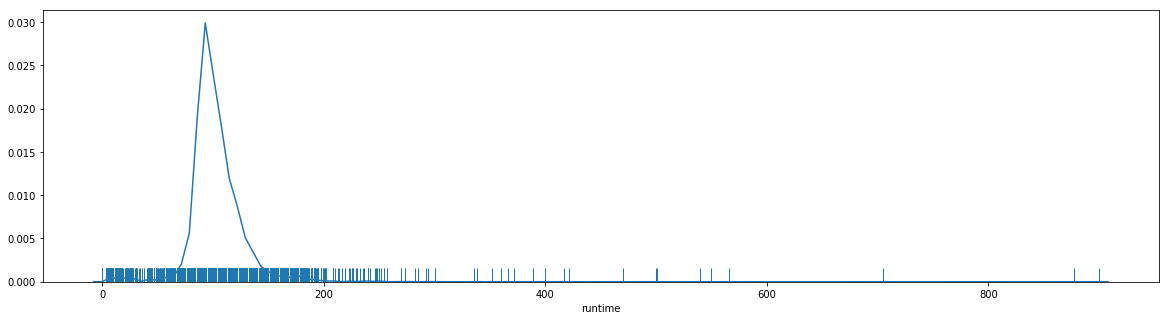

In [12]:
plt.subplots(figsize=(20,5))
sns.distplot(df_clean.runtime, rug=True, hist=False);

Hmm, tons of movies with runtime more than 200. I don't believe in movies longer than 200 minutes or shorter than 30 minutes, so, I'll drop them, for the sake of easier analysis.

In [13]:
df_clean = df_clean[(df_clean.runtime > 30) & (df_clean.runtime < 200)]

Let's see a distribution of movie runtime of our dataset after removing movies that are less than 30 minutes long and more than 200 minutes.

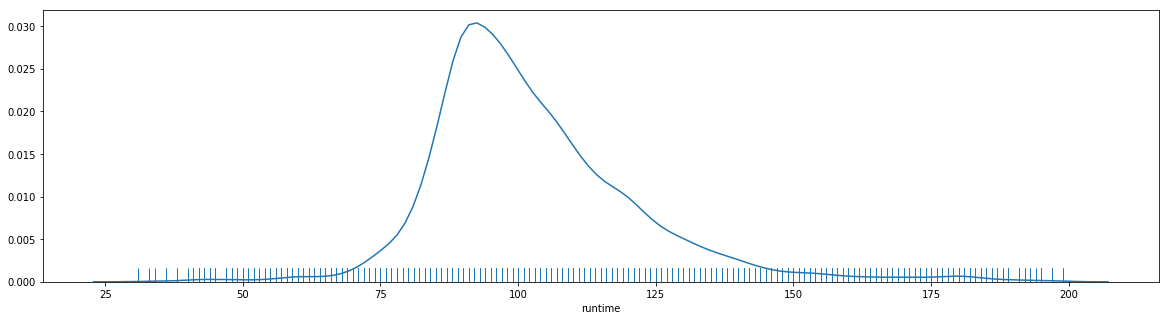

In [14]:
plt.subplots(figsize=(20,5))
sns.distplot(df_clean.runtime, rug=True, hist=False);

In [15]:
print("After runtime cleanup, there are {} records".format(df_clean.runtime.shape[0]))

After runtime cleanup, there are 10458 records


Most movies are 90 minutes, makes sense. Hmm, Question for later, why most movies are 90 minutes long? Could it be the size of CD rom at that time?

# Delimiter

As per the documentation, there are columns with delimter, containing multiple values in each cell. Let's find those cells:

In [16]:
# without escapping the pipe (|), we might get wrong results
df_clean.apply(lambda x: x.str.contains("\|"), axis=1).any()

cast             True
director         True
runtime         False
genres           True
vote_count      False
vote_average    False
release_year    False
budget_adj      False
revenue_adj     False
dtype: bool

3 Columns have the delimter: cast, director, and genres. Let's take a sample and see some dataset and if really is a delimter in the columns other than cast:

In [17]:
for c in ['cast', 'director', 'genres']:
    print("\nSample of {}".format(c))
    print(df_clean[df_clean[c].str.contains('\|')][c].sample())


Sample of cast
id
627    Ewan McGregor|Ewen Bremner|Jonny Lee Miller|Ro...
Name: cast, dtype: object

Sample of director
id
6935    Ariel Zeitoun|Julien Seri
Name: director, dtype: object

Sample of genres
id
45269    Drama|History
Name: genres, dtype: object


To process them, or at least decide to drop them, let's find out how many unique {director, cast, genre}

In [18]:
def unique_values(series):
    s = set()
    for row in series:
        s.update(row.split('|'))
    return s

for c in ['cast', 'director', 'genres']:
    print("There are: {} unique {}".format(len(unique_values(df_clean[c])), c))

There are: 18563 unique cast
There are: 5152 unique director
There are: 20 unique genres


Hmmm, in this case, we could either do hot encoding, or expand the series to multiple columns. Let's see first the maximum number of {cast, director, genres} in each cell:

In [19]:
for c in ['cast', 'director', 'genres']:
    print("The maximum {} in a single cell is {}".format(c, df_clean[c].apply(lambda x: x.count("|")).max()))

The maximum cast in a single cell is 4
The maximum director in a single cell is 35
The maximum genres in a single cell is 4


Let's look at the distrobution of directors:

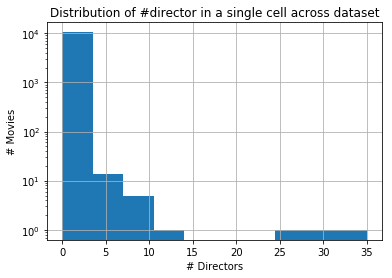

In [20]:
df_clean['director'].apply(lambda x: x.count("|")).hist(log=True)
plt.title('Distribution of #director in a single cell across dataset');
plt.xlabel('# Directors');
plt.ylabel('# Movies');

I think I won't waste time on the directors. I'll just drop them. 

In [21]:
df_clean.drop(labels=['director'], axis=1, inplace=True);

A quick look at the dataset now:

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10458 entries, 135397 to 22293
Data columns (total 8 columns):
cast            10458 non-null object
runtime         10458 non-null int64
genres          10458 non-null object
vote_count      10458 non-null int64
vote_average    10458 non-null float64
release_year    10458 non-null int64
budget_adj      10458 non-null float64
revenue_adj     10458 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 735.3+ KB


Let's hot encode genres and expand casts:

In [23]:
# Genres Hot encoding 
genres_dummies = df_clean.genres.str.get_dummies('|')
df_clean = df_clean.merge(genres_dummies, left_on='id', right_on='id')
list_of_genres = genres_dummies.columns

# Expand casts
expanded_df = df_clean['cast'].str.split("\|", expand=True).add_prefix('cast')
df_clean[expanded_df.columns] = expanded_df;

In [24]:
# To see how the dataframe looks like now
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10458 entries, 135397 to 22293
Data columns (total 33 columns):
cast               10458 non-null object
runtime            10458 non-null int64
genres             10458 non-null object
vote_count         10458 non-null int64
vote_average       10458 non-null float64
release_year       10458 non-null int64
budget_adj         10458 non-null float64
revenue_adj        10458 non-null float64
Action             10458 non-null int64
Adventure          10458 non-null int64
Animation          10458 non-null int64
Comedy             10458 non-null int64
Crime              10458 non-null int64
Documentary        10458 non-null int64
Drama              10458 non-null int64
Family             10458 non-null int64
Fantasy            10458 non-null int64
Foreign            10458 non-null int64
History            10458 non-null int64
Horror             10458 non-null int64
Music              10458 non-null int64
Mystery            10458 non-null int6

# What causes movie to have a high revenue?

One possible correlation is the budget:

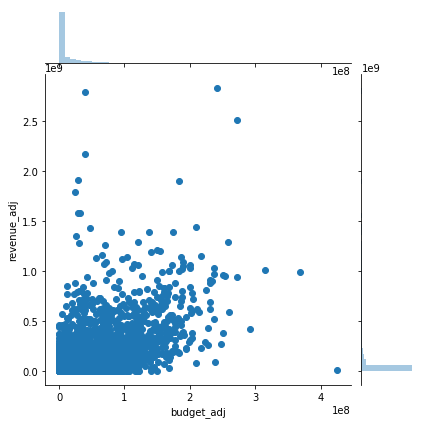

In [25]:
sns.jointplot(x='budget_adj', y='revenue_adj', data=df_clean);

In [ ]:
high = df_clean[df_clean.revenue_adj > df_clean.revenue_adj.mean()]
low = df_clean[df_clean.revenue_adj <= df_clean.revenue_adj.mean()]
sns.pairplot(low, x_vars='revenue_adj', y_vars=df_clean.columns)

# Dominant genre per year (in number of released movies)

To get the dominant genre per year, we have to group 

In [344]:
x = df_clean.groupby('release_year', as_index=True)[list_of_genres].agg(['sum'])

In [343]:
most_genre_per_year = x.idxmax(axis=1).apply(lambda x: x[0])
most_genre_per_year

release_year
2006    Drama
2007    Drama
2008    Drama
2009    Drama
2010    Drama
2011    Drama
2012    Drama
2013    Drama
2014    Drama
2015    Drama
dtype: object

*******

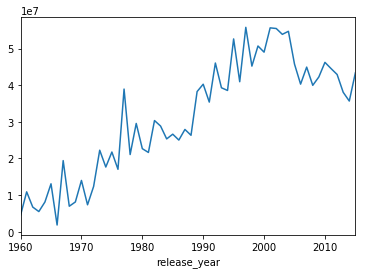

In [121]:
df_clean.groupby('release_year')['revenue'].mean().plot()

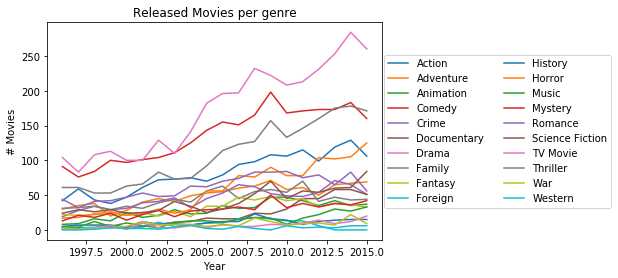

In [54]:
x = df_clean.groupby('release_year')[list_of_genres].sum().tail(20)
plt.plot(x[list_of_genres])
plt.title('Released Movies per genre')
plt.xlabel('Year')
plt.ylabel('# Movies')
plt.legend(list_of_genres, loc=5, ncol=2,  bbox_to_anchor=(1.7, 0.5))

The graph looks a bit dense, let's split the 20 generes over 2 plots

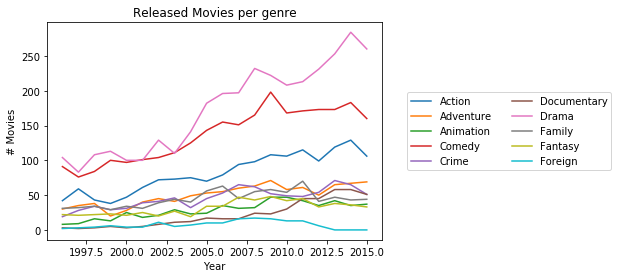

In [69]:
x = df_clean.groupby('release_year')[list_of_genres[:10]].sum().tail(20)
plt.plot(x[list_of_genres[:10]])
plt.title('Released Movies per genre')
plt.xlabel('Year')
plt.ylabel('# Movies')
plt.legend(list_of_genres[:10], loc=5, ncol=2,  bbox_to_anchor=(1.7, 0.5))

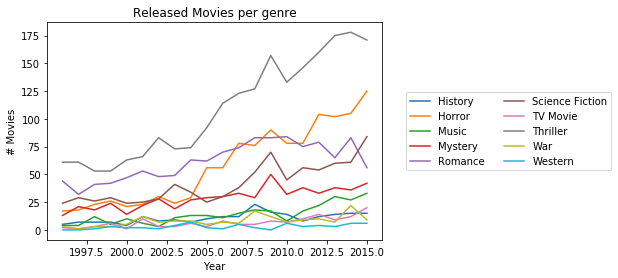

In [72]:
x = df_clean.groupby('release_year')[list_of_genres[10:]].sum().tail(20)
plt.plot(x[list_of_genres[10:]])
plt.title('Released Movies per genre')
plt.xlabel('Year')
plt.ylabel('# Movies')
plt.legend(list_of_genres[10:], loc=5, ncol=2,  bbox_to_anchor=(1.7, 0.5))

From how it looks like in the plot, number of drama movies are really increasing the most. After my wife and I had out daughter 6 years ago, and we've been only to family movies. I guess, I need to some drama movies more. Unfortunately, Thriller and Horror movies (as they excel in the second graph) is out of the question for us now :)

So, let's say I want to watch a horror movie, in a night with our children are asleep, and I want to watch something that has high rating